# The Monty Hall Problem

This notebooks implements a solutions 

In [1]:
import pandas as pd
import numpy as np

# Model

![](monty-hall-as-pgm.png)

$$
X(): x \sim random(D)\\
G_1(): g_1 \sim random(D)\\
H(x, g_1): h \sim random(D - \{x \cup g_1\})\\
G_2(g_1, h, s) = \left\{ \begin{array}{ll}
        s = switch: & D - \{h \cup g_1\} \\
        s = keep: & g_1 \\
        s = flip: & random(D - h)
\end{array} \right.\\
R(x, g_2): r = x \equiv g_2\\
$$

Example game where contestant switched and won.

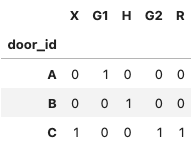

# As Class

In [49]:
class MontyHall():
    
    S  = "keep switch flip".split()
    D = "A B C".split()

    # Initialize the game 
    def __init__(self, s = 'switch'):
        if s not in self.S:
            raise ValueError(f"s must be one of {S}.")
        self.s = s
        self.game = pd.DataFrame(dict(X = None), index=pd.Index(self.D, name='door_id'))
            
    # Hide the car
    def X(self):
        self.game.X = 0
        self.game.loc[self.game.sample().index, 'X'] = 1
        
    # Contestant's first guess
    def G1(self):
        self.game['G1'] = 0
        self.game.loc[self.game.sample().index, 'G1'] = 1
        
    # Host's reveal
    def H(self):
        self.game['H'] = 0
        # idx = (self.game.X + self.game.G1) == 0
        self.game.loc[self.game[(self.game.X == 0) & (self.game.G1 == 0)].sample().index, 'H'] = 1
        
    # Contestant's second guess
    def G2(self):
        self.game['G2'] = 0
        if self.s == 'switch':
            # idx = (self.game.G1 + self.game.H) == 0
            self.game.loc[self.game[(self.game.G1 == 0) & (self.game.H == 0)].index, 'G2'] = 1
        elif self.s == 'keep':
            self.game.G2 = self.game.G1
        elif self.s == 'flip':
            # idx = self.game.H == 0
            self.game.loc[self.game[self.game.H == 0].sample().index, 'G2'] = 1
        else:
            pass
        
    # Result of the game
    def R(self):
        self.game['R'] = self.game.X * self.game.G2
        self.result = self.game.R.sum()
        
    def play(self):
        self.X()
        self.G1()
        self.H()
        self.G2()
        self.R() 
        return self
    
    def play_many(self, n=1000):
        return sum([mh.play().result for i in range(n)]) / n    

In [41]:
mh = MontyHall()

In [42]:
mh.s = 'keep'
mh.play_many()

0.333

In [46]:
mh.s = 'switch'
mh.play_many()

0.664

In [44]:
mh.s = 'flip'
mh.play_many()

0.503

In [48]:
mh.game

,X,G1,H,G2,R
door_id,,,,,
A,0,1,0,0,0
B,0,0,1,0,0
C,1,0,0,1,1
